# Protein Biomarker Analysis

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

## Preprocessing

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Get var names
var_names = pd.read_csv(
    "https://raw.githubusercontent.com/pstat197/module-1-biomarker-data-table_ten/refs/heads/main/data/biomarker-raw.csv",
    header=None,
    nrows=2
).iloc[:, 2:].T
var_names.columns = ["name", "abbreviation"]
var_names.dropna(inplace=True)

# Get data
biomarker = pd.read_csv(
    "https://raw.githubusercontent.com/pstat197/module-1-biomarker-data-table_ten/refs/heads/main/data/biomarker-raw.csv",
    skiprows=2,
    dtype={"Group": "string"},
    na_values=["-", ""]
)

# drop 2nd col
biomarker.drop(biomarker.columns[1], axis=1, inplace=True)

# assign col names
biomarker.columns = ["group"] + list(var_names["abbreviation"]) + ["ados"]

# drop nas
biomarker = biomarker[biomarker["group"].notna() & (biomarker["group"] != "")].copy()

# reorder cols
cols = [c for c in biomarker.columns if c not in ["group", "ados"]]
biomarker = biomarker[["group", "ados"] + cols]

biomarker


,group,ados,CHIP,CEBPB,NSE,PIAS4,IL-10 Ra,STAT3,IRF1,c-Jun,...,UB2G2,Transgelin-2,ATPO,Corticotropin-lipotropin,QORL1,PEDF,CATF,FTCD,UBP25,PLXB2
0,ASD,21.0,512.2,1697.8,2628.3,1484.3,1711.9,548.3,1213.8,3188.0,...,5073.3,3296.2,1813.6,555.0,1345.0,24201.3,2273.2,1918.9,1708.0,2655.9
1,ASD,12.0,438.5,1121.7,857.3,1419.4,1926.3,412.6,1222.3,2373.1,...,4553.0,2875.7,1482.6,543.0,1980.2,20143.1,4092.6,501.2,1386.4,3091.6
2,ASD,20.0,505.0,1209.7,1394.0,1036.1,1551.6,523.3,1982.2,2652.5,...,4402.7,3096.2,1399.8,1178.8,1711.1,27553.1,2979.8,1040.4,1508.9,2166.9
3,ASD,22.0,440.7,1120.2,885.0,925.8,1518.5,523.9,1422.4,2373.8,...,4560.1,3282.5,1439.8,619.6,1497.2,27775.2,2720.1,1312.6,1445.9,2887.4
4,ASD,17.0,499.3,1822.5,658.2,1087.4,1650.8,459.0,1203.1,3050.3,...,5174.5,2841.5,1352.4,562.2,2565.6,24326.9,4084.0,1623.5,1532.3,2912.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,TD,NaN,617.7,1659.7,1137.7,1580.4,1816.3,596.8,1212.1,3050.2,...,6307.2,3465.6,1682.5,741.5,1577.3,29677.4,3085.3,865.3,1700.3,2553.9
150,TD,NaN,611.6,1537.5,726.0,1044.4,1657.7,557.5,1197.6,3014.6,...,5931.7,3223.5,2005.3,704.9,2203.2,23413.0,3870.3,2018.0,1796.9,2696.1
151,TD,NaN,537.5,1847.7,809.2,1367.0,2049.2,462.5,1292.6,3903.5,...,6714.2,4054.9,1940.0,776.0,2004.3,24354.0,2583.5,1037.5,1870.7,2964.4
152,TD,NaN,580.1,1954.7,980.5,1379.8,1771.3,777.8,1551.7,3484.5,...,6484.8,3771.4,2193.1,880.5,1493.6,20657.4,3106.4,946.8,1945.2,2584.2


## Why perform a log-transform on protein levels?

Randomly selected proteins:
	 1. Factor I
	 2. PTH
	 3. NSF1C


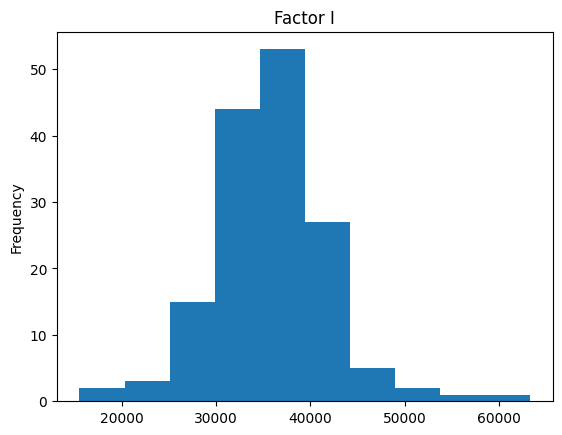

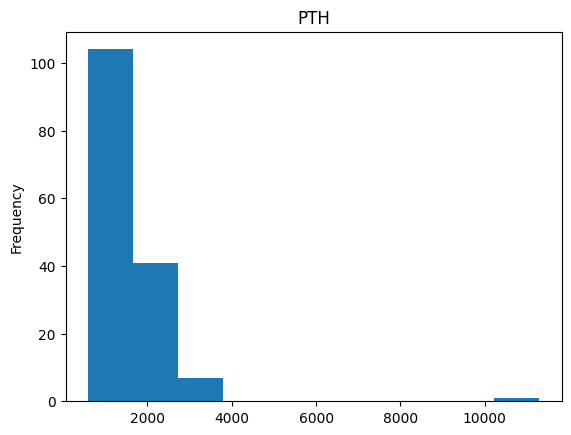

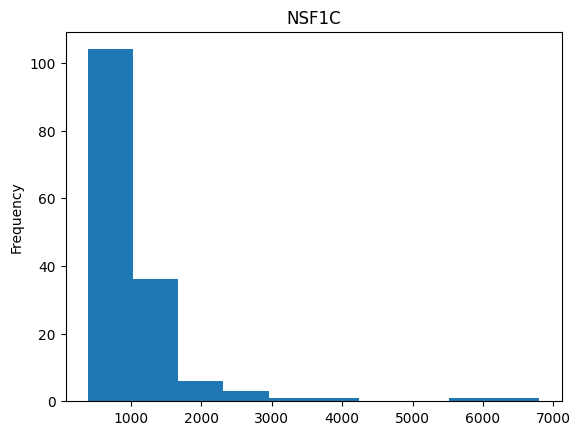

In [49]:
# Sample 3 random proteins
proteins = biomarker.columns
# Exclude the 'Group' column as it is not numeric
numeric_proteins = proteins.drop('group')
random_proteins = random.sample(list(numeric_proteins), 3)

print(f"Randomly selected proteins:")
for i, protein in enumerate(random_proteins):
    print(f"\t {i+1}. {protein}")


random_protein_levels = biomarker[random_proteins]

for protein in random_proteins:
    plt.figure()
    random_protein_levels[protein].plot(kind="hist", title=protein)

From the above plot, we can see that protein levels tend to have a right skew. By applying a log-transformation, the data should closely represent a normal distribution, making it suitable for inference.

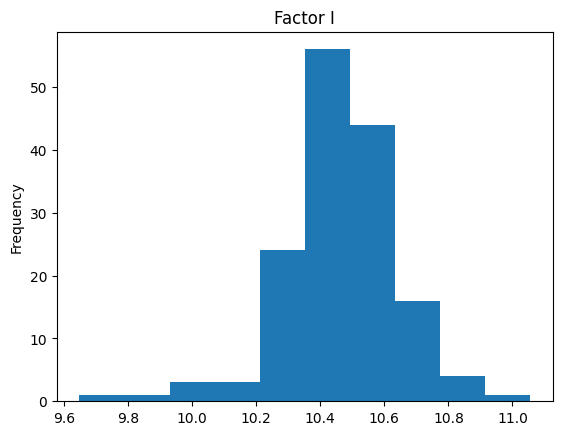

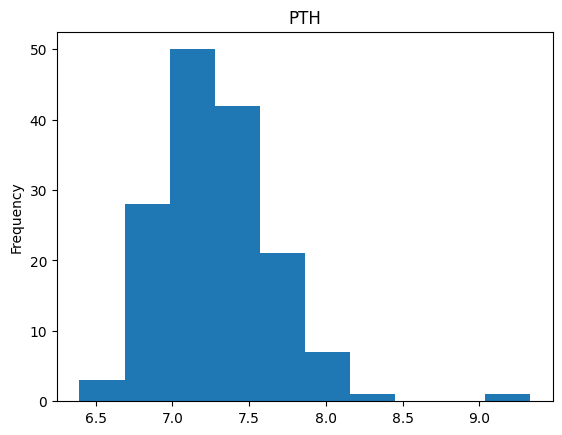

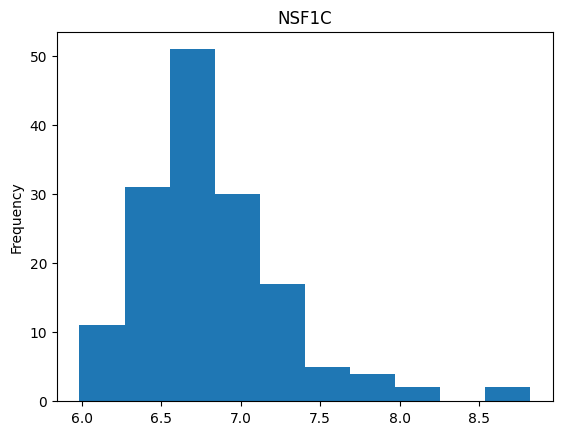

In [51]:
# perform log transform
group_col = biomarker["group"]
biomarker.drop(columns=["group"], inplace=True)
biomarker = np.log(biomarker)
biomarker.insert(0, "group", group_col)

# plot transformed previously selected proteins for comparison

random_protein_levels = biomarker[random_proteins]

for protein in random_proteins:
    plt.figure()
    random_protein_levels[protein].plot(kind="hist", title=protein)

The log transformation has successfully addressed the right-skewed problem, producing normalized data.

## Outliers